## Automating Crypto Website API

In [6]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '9c368b98-5f8a-48be-9f52-34cbb5df7171',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [7]:
type(data)

dict

In [8]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [34]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11635,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19740296.00000,19740296.00000,False,NaN,1,NaN,NaN,None,2024-08-15T14:54:00.000Z,59552.96724,30016953108.60419,-6.79220,0.29316,0.03194,1.37238,-6.57945,-10.49331,-10.39803,1175593201041.44580,55.82750,1250612312088.44995,None,2024-08-15T14:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-15 20:48:35.333184
1,1027,Ethereum,ETH,ethereum,9213,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120277040.25230,120277040.25230,True,NaN,2,NaN,NaN,None,2024-08-15T14:53:00.000Z,2658.73473,13451869402.72883,-21.47980,0.00280,0.12538,6.40887,-21.91279,-25.74018,-13.87268,319784744546.11127,15.19670,319784744546.10999,None,2024-08-15T14:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-15 20:48:35.333184
2,825,Tether USDt,USDT,tether,94315,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,116532189829.29184,118060317087.51747,True,NaN,3,NaN,NaN,None,2024-08-15T14:52:00.000Z,1.00013,48613218442.00649,-11.93570,-0.05006,-0.01938,-0.04595,-0.02997,0.06630,-0.02615,116547759004.26653,5.54760,118076090426.52000,None,2024-08-15T14:52:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-15 20:48:35.333184
3,1839,BNB,BNB,bnb,2210,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145936300.18019,145936300.18019,False,NaN,4,NaN,NaN,None,2024-08-15T14:53:00.000Z,529.93134,1573089806.56808,-3.76740,0.36287,1.43975,7.00406,-6.70379,-12.95094,-8.79145,77336219461.85106,3.67260,77336219461.85001,None,2024-08-15T14:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-15 20:48:35.333184
4,5426,Solana,SOL,solana,717,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,466835112.29569,582259275.29654,True,NaN,5,NaN,NaN,None,2024-08-15T14:52:00.000Z,145.61611,2195673304.99714,-20.06790,0.64675,-0.84403,-8.80314,-6.37071,-0.59211,-12.90247,67978713833.07848,3.23580,84786331639.44000,None,2024-08-15T14:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-15 20:48:35.333184
5,3408,USDC,USDC,usd-coin,21504,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,34526553860.35343,34526553860.35343,False,NaN,6,NaN,NaN,None,2024-08-15T14:52:00.000Z,1.00012,6310655740.52402,-1.26640,-0.03965,0.01614,0.00021,0.00816,-0.00369,-0.01063,34530535322.92651,1.64280,34530535322.93000,None,2024-08-15T14:52:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-15 20:48:35.333184
6,52,XRP,XRP,xrp,1366,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,56113081096.00000,99987342059.00000,False,NaN,7,NaN,NaN,None,2024-08-15T14:54:00.000Z,0.57107,996847422.88438,-20.81730,0.43724,-0.47021,-6.62327,-1.33646,16.50411,9.39887,32044363405.16895,1.52280,57106761523.84000,None,2024-08-15T14:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-15 20:48:35.333184
7,11419,Toncoin,TON,toncoin,510,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2518624275.58621,5110505925.89101,True,NaN,8,3414166606.00000,22834134237.97668,None,2024-08-15T14:53:00.000Z,6.68806,463745298.36471,-25.88410,0.55543,-3.27020,5.59405,-8.85653,-16.15157,0.23938,16844697825.43536,0.79990,34179345006.39000,None,2024

In [44]:
import os

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '9c368b98-5f8a-48be-9f52-34cbb5df7171',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df3 = pd.DataFrame(df2)
    df = pd.concat([df, df3])

    # TO LOAD A CSV FILE FROM THE DATAFRAME BELOW:
    # df = pd.json_normalize(data['data'])
    # df['Timestamp'] = pd.to_datetime('now')
    # df

    # if not os.path.isfile(r'C:\Learn Excel\Tableau Datasets\Web Scrapping using Python and Pandas\API.csv'):
    #    df.to_csv(r'C:\Learn Excel\Tableau Datasets\Web Scrapping using Python and Pandas\API.csv', header='column_names')
    # else:
    #   df.to_csv(r'C:\Learn Excel\Tableau Datasets\Web Scrapping using Python and Pandas\API.csv', mode= 'a', header = False)

In [45]:
from time import time
from time import sleep

for i in range(333):    #333 is the limit for the API usage for a day
    api_runner()
    print('API Runner completed')
    sleep(60)   #sleep for 1 minute
exit()

API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [ ]:
# df4 = pd.read_csv(r'C:\Learn Excel\Tableau Datasets\Web Scrapping using Python and Pandas\API.csv')
# df4

In [58]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,11635,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19740303.00000,19740303.00000,False,NaN,1,NaN,NaN,None,2024-08-15T15:26:00.000Z,59739.97829,29910157822.11555,-7.95490,0.67235,0.75053,1.32990,-7.13616,-10.24602,-10.94586,1179285272750.76978,56.16150,1254539544188.66992,None,2024-08-15T15:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-15 20:57:28.516172
1,1027,Ethereum,ETH,ethereum,9213,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120277040.25230,120277040.25230,True,NaN,2,NaN,NaN,None,2024-08-15T15:25:00.000Z,2663.95418,13260109737.64874,-23.11380,0.55550,0.53001,6.91506,-22.46352,-25.63717,-13.95250,320412523886.61066,15.21200,320412523886.60999,None,2024-08-15T15:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-15 20:57:28.516172
2,825,Tether USDt,USDT,tether,94315,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,116532189829.29184,118060317087.51747,True,NaN,3,NaN,NaN,None,2024-08-15T15:25:00.000Z,1.00018,48348402838.78342,-12.83760,0.02232,-0.02969,-0.04708,-0.03049,0.07709,-0.03683,116553677064.40007,5.53350,118082086092.24001,None,2024-08-15T15:25:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-15 20:57:28.516172
3,1839,BNB,BNB,bnb,2210,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145936297.94801,145936297.94801,False,NaN,4,NaN,NaN,None,2024-08-15T15:25:00.000Z,530.42450,1564936480.23019,-4.38060,0.58234,1.32503,7.01769,-7.46613,-12.88809,-9.09664,77408187617.37282,3.68640,77408187617.37000,None,2024-08-15T15:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-15 20:57:28.516172
4,5426,Solana,SOL,solana,717,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,466835112.29569,582259275.29654,True,NaN,5,NaN,NaN,None,2024-08-15T15:25:00.000Z,145.71861,2178044844.12136,-21.85030,0.96662,-0.05900,-8.57242,-7.48354,-0.93066,-14.06665,68026562289.07290,3.22960,84846010542.28999,None,2024-08-15T15:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-15 20:57:28.516172
5,3408,USDC,USDC,usd-coin,21504,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,34530378908.83112,34530378908.83112,False,NaN,6,NaN,NaN,None,2024-08-15T15:25:00.000Z,1.00018,6271351398.93107,-2.38690,0.01836,0.00546,0.01121,0.01912,0.00902,0.00526,34536750987.72791,1.63970,34536750987.73000,None,2024-08-15T15:25:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-15 20:57:28.516172
6,52,XRP,XRP,xrp,1366,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,56113081096.00000,99987342059.00000,False,NaN,7,NaN,NaN,None,2024-08-15T15:26:00.000Z,0.57072,988813049.33637,-21.31340,0.18454,-0.65157,-7.20117,-1.73684,16.37958,8.47849,32024741009.85010,1.52040,57071792146.04000,None,2024-08-15T15:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-15 20:57:28.516172
7,11419,Toncoin,TON,toncoin,510,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2518628315.70198,5110510909.54589,True,NaN,8,3414166606.00000,22784219271.02913,None,2024-08-15T15:25:00.000Z,6.67344,449753220.89268,-29.76140,0.19824,-3.58058,6.19317,-9.46569,-16.53556,0.06867,16807902609.76995,0.80040,34104662890.63000,None,2024-08-

In [16]:
# One thing I noticed was the scientific notation. I like it, but I want to be able to see the numbers in this case
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [47]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,11635,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19740303.00000,19740303.00000,False,NaN,1,NaN,NaN,None,2024-08-15T15:26:00.000Z,59739.97829,29910157822.11555,-7.95490,0.67235,0.75053,1.32990,-7.13616,-10.24602,-10.94586,1179285272750.76978,56.16150,1254539544188.66992,None,2024-08-15T15:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-15 20:57:28.516172
1,1027,Ethereum,ETH,ethereum,9213,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120277040.25230,120277040.25230,True,NaN,2,NaN,NaN,None,2024-08-15T15:25:00.000Z,2663.95418,13260109737.64874,-23.11380,0.55550,0.53001,6.91506,-22.46352,-25.63717,-13.95250,320412523886.61066,15.21200,320412523886.60999,None,2024-08-15T15:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-15 20:57:28.516172
2,825,Tether USDt,USDT,tether,94315,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,116532189829.29184,118060317087.51747,True,NaN,3,NaN,NaN,None,2024-08-15T15:25:00.000Z,1.00018,48348402838.78342,-12.83760,0.02232,-0.02969,-0.04708,-0.03049,0.07709,-0.03683,116553677064.40007,5.53350,118082086092.24001,None,2024-08-15T15:25:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-15 20:57:28.516172
3,1839,BNB,BNB,bnb,2210,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145936297.94801,145936297.94801,False,NaN,4,NaN,NaN,None,2024-08-15T15:25:00.000Z,530.42450,1564936480.23019,-4.38060,0.58234,1.32503,7.01769,-7.46613,-12.88809,-9.09664,77408187617.37282,3.68640,77408187617.37000,None,2024-08-15T15:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-15 20:57:28.516172
4,5426,Solana,SOL,solana,717,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,466835112.29569,582259275.29654,True,NaN,5,NaN,NaN,None,2024-08-15T15:25:00.000Z,145.71861,2178044844.12136,-21.85030,0.96662,-0.05900,-8.57242,-7.48354,-0.93066,-14.06665,68026562289.07290,3.22960,84846010542.28999,None,2024-08-15T15:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-15 20:57:28.516172
5,3408,USDC,USDC,usd-coin,21504,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,34530378908.83112,34530378908.83112,False,NaN,6,NaN,NaN,None,2024-08-15T15:25:00.000Z,1.00018,6271351398.93107,-2.38690,0.01836,0.00546,0.01121,0.01912,0.00902,0.00526,34536750987.72791,1.63970,34536750987.73000,None,2024-08-15T15:25:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-15 20:57:28.516172
6,52,XRP,XRP,xrp,1366,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,56113081096.00000,99987342059.00000,False,NaN,7,NaN,NaN,None,2024-08-15T15:26:00.000Z,0.57072,988813049.33637,-21.31340,0.18454,-0.65157,-7.20117,-1.73684,16.37958,8.47849,32024741009.85010,1.52040,57071792146.04000,None,2024-08-15T15:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-15 20:57:28.516172
7,11419,Toncoin,TON,toncoin,510,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2518628315.70198,5110510909.54589,True,NaN,8,3414166606.00000,22784219271.02913,None,2024-08-15T15:25:00.000Z,6.67344,449753220.89268,-29.76140,0.19824,-3.58058,6.19317,-9.46569,-16.53556,0.06867,16807902609.76995,0.80040,34104662890.63000,None,2024-08-

In [48]:
df5 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean(numeric_only=True)
df5

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.40272,0.75960,1.16620,-7.45807,-10.39676,-11.32368
Ethereum,0.53329,0.79203,7.01332,-22.57443,-25.60963,-14.09610
Tether USDt,0.01879,-0.02312,-0.03820,-0.01784,0.08469,-0.03115
BNB,0.52569,1.43243,6.99396,-7.53573,-12.87530,-9.14656
Solana,0.95202,0.27071,-8.61369,-7.54770,-0.85624,-14.07761
USDC,0.02129,0.01503,0.01664,0.03115,0.01670,0.01857
XRP,0.11826,-0.55699,-7.29438,-2.26148,16.37222,8.49951
Toncoin,0.17219,-3.48424,6.26871,-9.48223,-16.54344,-0.06942
Dogecoin,0.42183,2.02550,2.17021,-15.92090,-23.42471,-32.46282


In [49]:
df6 = df5.stack()
df6

name                                      
Bitcoin       quote.USD.percent_change_1h      0.40272
              quote.USD.percent_change_24h     0.75960
              quote.USD.percent_change_7d      1.16620
              quote.USD.percent_change_30d    -7.45807
              quote.USD.percent_change_60d   -10.39676
              quote.USD.percent_change_90d   -11.32368
Ethereum      quote.USD.percent_change_1h      0.53329
              quote.USD.percent_change_24h     0.79203
              quote.USD.percent_change_7d      7.01332
              quote.USD.percent_change_30d   -22.57443
              quote.USD.percent_change_60d   -25.60963
              quote.USD.percent_change_90d   -14.09610
Tether USDt   quote.USD.percent_change_1h      0.01879
              quote.USD.percent_change_24h    -0.02312
              quote.USD.percent_change_7d     -0.03820
              quote.USD.percent_change_30d    -0.01784
              quote.USD.percent_change_60d     0.08469
              quote.US

In [ ]:
type(df4)

In [50]:
df7 = df6.to_frame(name='values')
df7

values
name                                               
Bitcoin      quote.USD.percent_change_1h    0.40272
             quote.USD.percent_change_24h   0.75960
             quote.USD.percent_change_7d    1.16620
             quote.USD.percent_change_30d  -7.45807
             quote.USD.percent_change_60d -10.39676
             quote.USD.percent_change_90d -11.32368
Ethereum     quote.USD.percent_change_1h    0.53329
             quote.USD.percent_change_24h   0.79203
             quote.USD.percent_change_7d    7.01332
             quote.USD.percent_change_30d -22.57443
             quote.USD.percent_change_60d -25.60963
             quote.USD.percent_change_90d -14.09610
Tether USDt  quote.USD.percent_change_1h    0.01879
             quote.USD.percent_change_24h  -0.02312
             quote.USD.percent_change_7d   -0.03820
             quote.USD.percent_change_30d  -0.01784
             quote.USD.percent_change_60d   0.08469
             quote.USD.percent_change_90d  -0.03115
BNB          quote.USD.percent_change_1h    0.52569
             quote.USD.percent_change_24h   1.43243
             quote.USD.percent_change_7d    6.99396
             quote.USD.percent_change_30d  -7.53573
             quote.USD.percent_change_60d -12.87530
             quote.USD.percent_change_90d  -9.14656
Solana       quote.USD.percent_change_1h    0.95202
             quote.USD.percent_change_24h   0.27071
             quote.USD.percent_change_7d   -8.61369
             quote.USD.percent_change_30d  -7.54770
             quote.USD.percent_change_60d  -0.85624
             quote.USD.percent_change_90d -14.07761
USDC         quote.USD.percent_change_1h    0.02129
             quote.USD.percent_change_24h   0.01503
             quote.USD.percent_change_7d    0.01664
             quote.USD.percent_change_30d   0.03115
             quote.USD.percent_change_60d   0.01670
             quote.USD.percent_change_90d   0.01857
XRP          quote.USD.percent_change_1h    0.11826
             quote.USD.percent_change_24h  -0.55699
             quote.USD.percent_change_7d   -7.29438
             quote.USD.percent_change_30d  -2.26148
             quote.USD.percent_change_60d  16.37222
             quote.USD.percent_change_90d   8.49951
Toncoin      quote.USD.percent_change_1h    0.17219
             quote.USD.percent_change_24h  -3.48424
             quote.USD.percent_change_7d    6.26871
             quote.USD.percent_change_30d  -9.48223
             quote.USD.percent_change_60d -16.54344
             quote.USD.percent_change_90d  -0.06942
Dogecoin     quote.USD.percent_change_1h    0.42183
             quote.USD.percent_change_24h   2.02550
             quote.USD.percent_change_7d    2.17021
             quote.USD.percent_change_30d -15.92090
             quote.USD.percent_change_60d -23.42471
             quote.USD.percent_change_90d -32.46282
Cardano      quote.USD.percent_change_1h    0.27060
             quote.USD.percent_change_24h   0.72831
             quote.USD.percent_change_7d    0.12458
             quote.USD.percent_change_30d -23.94699
             quote.USD.percent_change_60d -18.49020
             quote.USD.percent_change_90d -29.96991
TRON         quote.USD.percent_change_1h   -0.14902
             quote.USD.percent_change_24h   0.60148
             quote.USD.percent_change_7d    3.70156
             quote.USD.percent_change_30d  -2.13846
             quote.USD.percent_change_60d  13.50081
             quote.USD.percent_change_90d   4.90975
Avalanche    quote.USD.percent_change_1h   -0.42365
             quote.USD.percent_change_24h  -1.27445
             quote.USD.percent_change_7d   -2.49023
             quote.USD.percent_change_30d -25.50857
             quote.USD.percent_change_60d -30.34038
             quote.USD.percent_change_90d -43.66289
Shiba Inu    quote.USD.percent_change_1h    0.26440
             quote.USD.percent_change_24h   0.86653
             quote.USD.percent_change_7d    1.45360
             quote.USD.percent_change_30d

In [51]:
df7.count()

values    90
dtype: int64

In [52]:
index = pd.Index(range(90))
df8 = df7.reset_index()
df8

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.40272
1,Bitcoin,quote.USD.percent_change_24h,0.75960
2,Bitcoin,quote.USD.percent_change_7d,1.16620
3,Bitcoin,quote.USD.percent_change_30d,-7.45807
4,Bitcoin,quote.USD.percent_change_60d,-10.39676
5,Bitcoin,quote.USD.percent_change_90d,-11.32368
6,Ethereum,quote.USD.percent_change_1h,0.53329
7,Ethereum,quote.USD.percent_change_24h,0.79203
8,Ethereum,quote.USD.percent_change_7d,7.01332
9,Ethereum,quote.USD.percent_change_30d,-22.57443


In [53]:
df9 = df8.rename(columns={'level_1':'percent_change'})
df9

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.40272
1,Bitcoin,quote.USD.percent_change_24h,0.75960
2,Bitcoin,quote.USD.percent_change_7d,1.16620
3,Bitcoin,quote.USD.percent_change_30d,-7.45807
4,Bitcoin,quote.USD.percent_change_60d,-10.39676
5,Bitcoin,quote.USD.percent_change_90d,-11.32368
6,Ethereum,quote.USD.percent_change_1h,0.53329
7,Ethereum,quote.USD.percent_change_24h,0.79203
8,Ethereum,quote.USD.percent_change_7d,7.01332
9,Ethereum,quote.USD.percent_change_30d,-22.57443


In [54]:
df9['percent_change'] = df9['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df9

,name,percent_change,values
0,Bitcoin,1h,0.40272
1,Bitcoin,24h,0.75960
2,Bitcoin,7d,1.16620
3,Bitcoin,30d,-7.45807
4,Bitcoin,60d,-10.39676
5,Bitcoin,90d,-11.32368
6,Ethereum,1h,0.53329
7,Ethereum,24h,0.79203
8,Ethereum,7d,7.01332
9,Ethereum,30d,-22.57443


In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

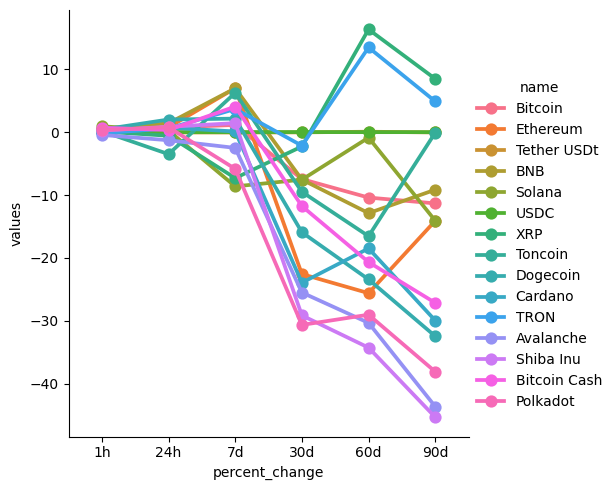

In [56]:
sns.catplot(x='percent_change', y='values', hue='name', data=df9, kind='point')

In [62]:
df10 = df[['name','quote.USD.price','Timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,Timestamp
0,Bitcoin,59739.97829,2024-08-15 20:57:28.516172
0,Bitcoin,59711.77312,2024-08-15 20:59:41.843500
0,Bitcoin,59657.88648,2024-08-15 21:00:42.141463
0,Bitcoin,59465.65442,2024-08-15 21:01:42.490228


<Axes: xlabel='Timestamp', ylabel='quote.USD.price'>

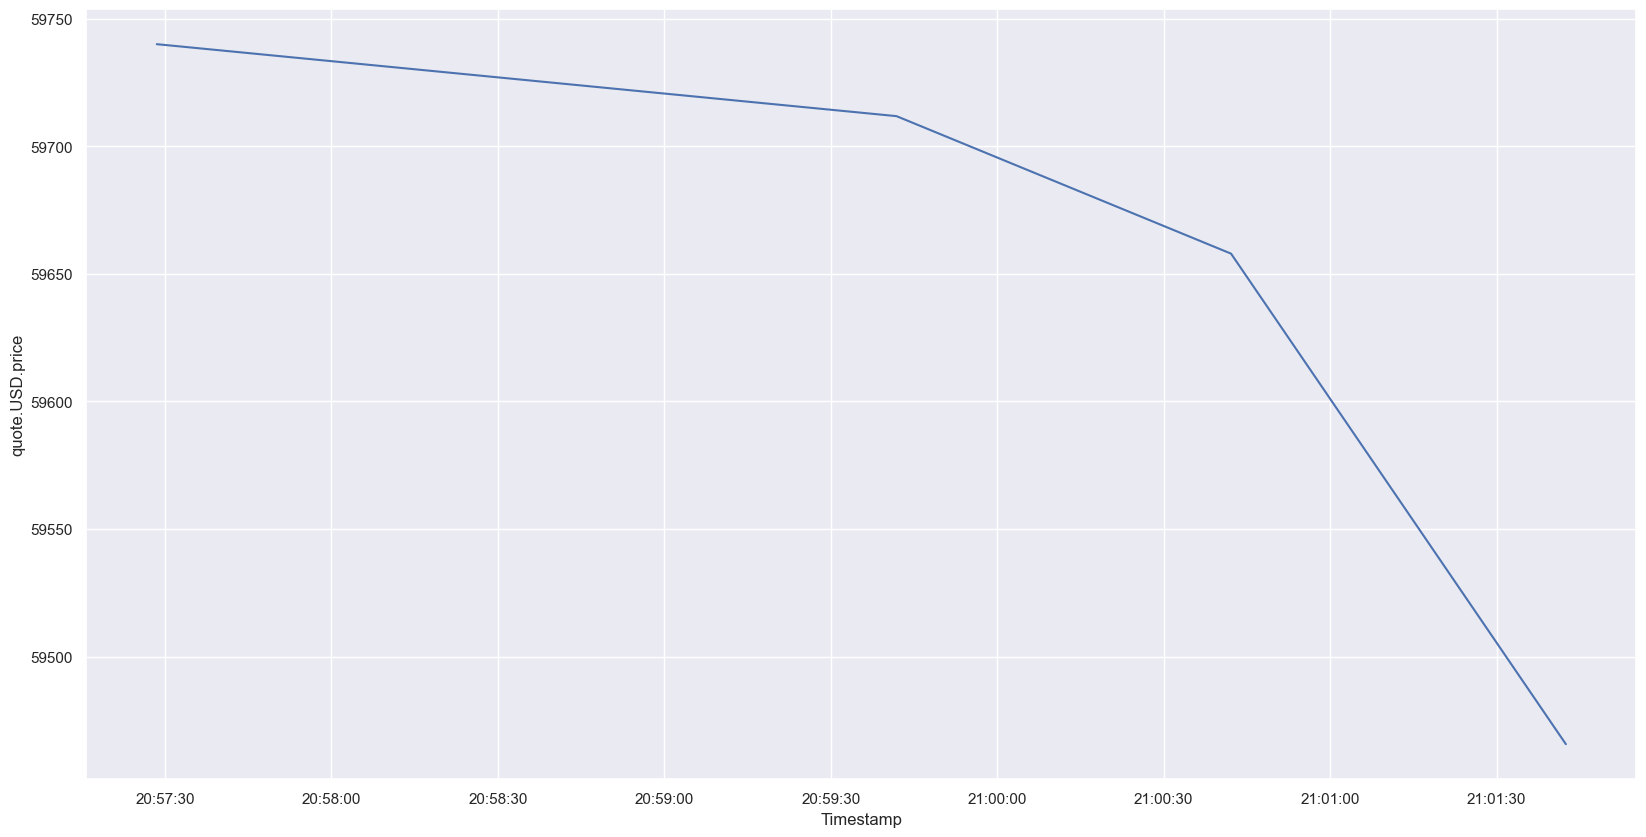

In [65]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(20,10))
sns.lineplot(x='Timestamp',y='quote.USD.price',data=df10)
